In [1]:
# Load dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import statsmodels.formula.api as smf

In [2]:
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [31]:
# Import csv files
monthly_composite = pd.read_csv('../Data-Analytics-Final_Project/Resources/monthly_composite.csv',index_col=False)

In [32]:
# Removing first 6 months of data due to unreliable exhaustion values
monthly_composite = monthly_composite.iloc[7:].reset_index(drop=True)

In [61]:
monthly_composite

,year_month,total_extracted,number_extract_points,average_exhaustion,average_sA,average_percent_extracted_per_point,run_days,average_extracted_per_day,average_pA,average_pB,average_pD,average_pC
0,200201,19178.0,74.0,25.46,0.219,1.45,22,872.0,0.214,NaN,NaN,NaN
1,200202,18074.0,61.0,29.85,0.221,1.92,21,861.0,0.206,NaN,NaN,NaN
2,200203,17399.0,67.0,30.10,0.229,1.57,20,870.0,0.230,NaN,NaN,NaN
3,200204,23748.0,75.0,31.33,0.241,1.37,19,1250.0,0.215,NaN,NaN,NaN
4,200205,23976.0,79.0,37.39,0.235,1.32,21,1142.0,0.205,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
213,201911,14984.0,106.0,90.60,0.180,1.16,16,936.0,0.128,2.651545,0.007970,0.001930
214,201912,13234.0,95.0,98.23,0.185,1.21,14,945.0,0.137,2.864889,0.008481,0.002070
215,202001,20024.0,114.0,95.30,0.183,0.90,15,1335.0,0.141,2.975722,0.009533,0.002242
216,202002,19643.0,122.0,99.56,0.175,0.93,14,1403.0,0.150,2.801782,0.010231,0.001921


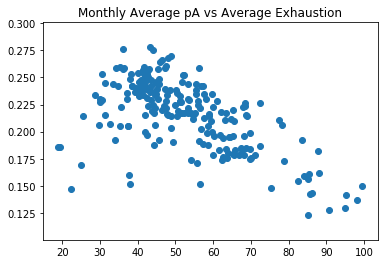

In [67]:
# Look at scatter plots of each independent variable to identify any trends right away
plt.scatter(monthly_composite['average_exhaustion'],monthly_composite['average_pA'])
plt.title('Monthly Average pA vs Average Exhaustion')
plt.show()

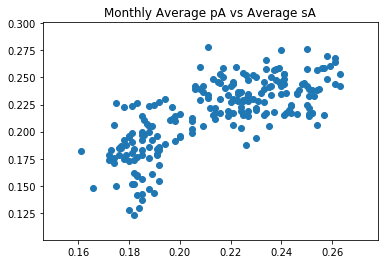

In [65]:
# Look at scatter plots of each independent variable to identify any trends right away
plt.scatter(monthly_composite['average_sA'],monthly_composite['average_pA'])
plt.title('Monthly Average pA vs Average sA')
plt.show()

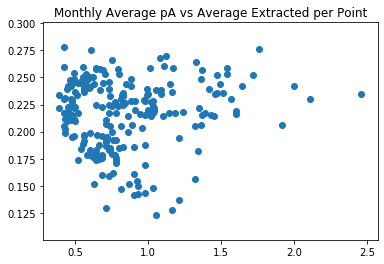

In [66]:
# Look at scatter plots of each independent variable to identify any trends right away
plt.scatter(monthly_composite['average_percent_extracted_per_point'],monthly_composite['average_pA'])
plt.title('Monthly Average pA vs Average Extracted per Point')
plt.show()

In [68]:
monthly_sel = monthly_composite[['average_exhaustion','average_sA','average_percent_extracted_per_point','average_pA']]
model = forward_selected(monthly_sel,'average_pA')

In [69]:
print (model.model.formula)

average_pA ~ average_sA + average_exhaustion + average_percent_extracted_per_point + 1


In [70]:
print(model.rsquared_adj)

0.6357232277786882


In [71]:
X = monthly_composite[['average_exhaustion','average_sA','average_percent_extracted_per_point']]
y = monthly_composite['average_pA'].values.reshape(-1,1)
print(X.shape,y.shape)

(218, 3) (218, 1)


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 3)

In [76]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [77]:
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')

Training Score: 0.6539803236791908
Testing Score: 0.5973465682955075


Text(0.5, 1.0, 'Residual Plot')

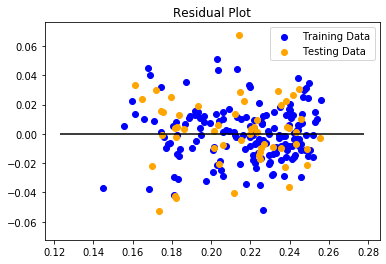

In [78]:
plt.scatter(model.predict(X_train),model.predict(X_train) - y_train, c='blue',label='Training Data')
plt.scatter(model.predict(X_test),model.predict(X_test) - y_test, c='orange', label='Testing Data')
plt.legend()
plt.hlines(y=0,xmin=y.min(),xmax=y.max())
plt.title('Residual Plot')

In [82]:
monthly_pA = monthly_composite.copy()
monthly_pA = monthly_pA[['year_month','average_exhaustion','average_sA','average_percent_extracted_per_point','average_pA']].dropna()
monthly_pA

,year_month,average_exhaustion,average_sA,average_percent_extracted_per_point,average_pA
0,200201,25.46,0.219,1.45,0.214
1,200202,29.85,0.221,1.92,0.206
2,200203,30.10,0.229,1.57,0.230
3,200204,31.33,0.241,1.37,0.215
4,200205,37.39,0.235,1.32,0.205
...,...,...,...,...,...
213,201911,90.60,0.180,1.16,0.128
214,201912,98.23,0.185,1.21,0.137
215,202001,95.30,0.183,0.90,0.141
216,202002,99.56,0.175,0.93,0.150


In [83]:
variables_list = []
num_vars_list = []
score_list = []
mse_list = []

In [84]:
variables_used = 'Exhaustion, sA, Extracted per Point'
num_variables = 3
X = monthly_pA[['average_exhaustion','average_sA','average_percent_extracted_per_point']]
y = monthly_pA['average_pA'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 3)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
SS_Residual = sum((y-predicted)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'R2 Value: {r_squared}')
print(f'Adjusted R2 value: {adjusted_r_squared}, note the difference is little due to the large number of data points vs variables')
from sklearn.metrics import mean_squared_error, r2_score
print(f'MSE: {mean_squared_error(y,predicted)}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(218, 3) (218, 1)
Exhaustion, sA, Extracted per Point
Training Score: 0.6539803236791908
Testing Score: 0.5973465682955075
R2 Value: [0.64048341]
Adjusted R2 value: [0.63544346], note the difference is negligible due to the large number of data points vs variables
MSE: 0.0003739582301129957


In [85]:
variables_used = 'Exhaustion'
num_variables = 1
X = monthly_pA[['average_exhaustion']]
y = monthly_pA['average_pA'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 3)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(218, 1) (218, 1)
Exhaustion
Training Score: 0.3729098901842257
Testing Score: 0.35086205759583133


In [86]:
variables_used = 'sA'
num_variables = 1
X = monthly_pA[['average_sA']]
y = monthly_pA['average_pA'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 3)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(218, 1) (218, 1)
sA
Training Score: 0.5442251273011303
Testing Score: 0.48995211606152084


In [87]:
variables_used = 'Extracted per Point'
num_variables = 1
X = monthly_pA[['average_percent_extracted_per_point']]
y = monthly_pA['average_pA'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 3)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(218, 1) (218, 1)
Extracted per Point
Training Score: 0.004048404245911241
Testing Score: -0.03130904188641859


In [88]:
variables_used = 'Exhaustion, sA'
num_variables = 2
X = monthly_pA[['average_exhaustion','average_sA']]
y = monthly_pA['average_pA'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 3)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(218, 2) (218, 1)
Exhaustion, sA
Training Score: 0.6242606029881328
Testing Score: 0.5611107674776958


In [89]:
variables_used = 'Exhaustion, Extracted per Point'
num_variables = 2
X = monthly_pA[['average_exhaustion','average_percent_extracted_per_point']]
y = monthly_pA['average_pA'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 3)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(218, 2) (218, 1)
Exhaustion, Extracted per Point
Training Score: 0.3764691184536557
Testing Score: 0.35096771347023703


In [90]:
variables_used = 'sA, Extracted per Point'
num_variables = 2
X = monthly_pA[['average_sA','average_percent_extracted_per_point']]
y = monthly_pA['average_pA'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 3)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(218, 2) (218, 1)
sA, Extracted per Point
Training Score: 0.5976675898342884
Testing Score: 0.5432436097007233


In [91]:
pA_reg_results = {'Variables':variables_list,
              'Number of Variables':num_vars_list,
              'Score':score_list,
              'MSE':mse_list}
pA_reg_results_df = pd.DataFrame(pA_reg_results).sort_values('Score',ascending=False)
pA_reg_results_df

,Variables,Number of Variables,Score,MSE
0,"Exhaustion, sA, Extracted per Point",3,0.640483,0.000374
4,"Exhaustion, sA",2,0.609123,0.000374
6,"sA, Extracted per Point",2,0.585304,0.000374
2,sA,1,0.532370,0.000374
5,"Exhaustion, Extracted per Point",2,0.374457,0.000374
1,Exhaustion,1,0.371935,0.000374
3,Extracted per Point,1,0.002401,0.000374


In [92]:
monthly_pA.to_csv('Resources/monthly_pA.csv',index=False)

Similar to the other results, all three variables yield the best score

In [ ]:
# pB analysis starts here

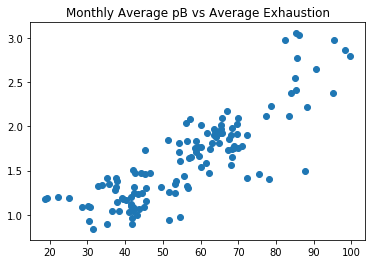

In [93]:
# Look at scatter plots of each independent variable to identify any trends right away
plt.scatter(monthly_composite['average_exhaustion'],monthly_composite['average_pB'])
plt.title('Monthly Average pB vs Average Exhaustion')
plt.show()

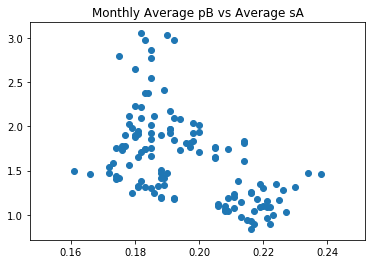

In [94]:
plt.scatter(monthly_composite['average_sA'],monthly_composite['average_pB'])
plt.title('Monthly Average pB vs Average sA')
plt.show()

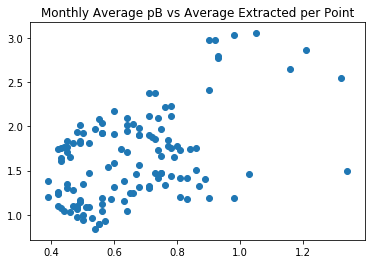

In [95]:
plt.scatter(monthly_composite['average_percent_extracted_per_point'],monthly_composite['average_pB'])
plt.title('Monthly Average pB vs Average Extracted per Point')
plt.show()

In [103]:
monthly_composite = monthly_composite[['year_month','average_exhaustion','average_sA','average_percent_extracted_per_point','average_pB']].dropna()
monthly_sel = monthly_composite.copy()
model = forward_selected(monthly_sel,'average_pB')
print (model.model.formula)
print(model.rsquared_adj)

average_pB ~ average_exhaustion + year_month + average_sA + 1
0.7644428140029371


In [104]:
X = monthly_composite[['average_exhaustion','average_sA','average_percent_extracted_per_point']]
y = monthly_composite['average_pB'].values.reshape(-1,1)
print(X.shape,y.shape)

(128, 3) (128, 1)


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42,test_size=0.25)
model = LinearRegression()

In [111]:
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')

Training Score: 0.7413143734484511
Testing Score: 0.6441075335709421


Text(0.5, 1.0, 'Residual Plot')

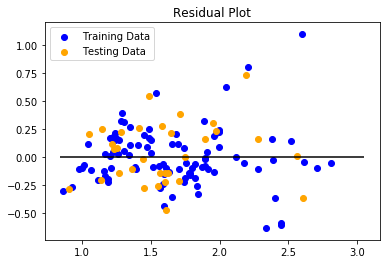

In [112]:
plt.scatter(model.predict(X_train),model.predict(X_train) - y_train, c='blue',label='Training Data')
plt.scatter(model.predict(X_test),model.predict(X_test) - y_test, c='orange', label='Testing Data')
plt.legend()
plt.hlines(y=0,xmin=y.min(),xmax=y.max())
plt.title('Residual Plot')

In [113]:
monthly_pB = monthly_composite.copy()
monthly_pB = monthly_pB[['year_month','average_exhaustion','average_sA','average_percent_extracted_per_point','average_pB']].dropna()
monthly_pB

,year_month,average_exhaustion,average_sA,average_percent_extracted_per_point,average_pB
90,200908,45.33,0.238,0.67,1.464125
91,200909,46.52,0.234,0.75,1.472000
92,200910,42.35,0.230,0.60,1.319250
93,200911,37.27,0.226,0.47,1.285053
94,200912,35.62,0.224,0.50,1.344667
...,...,...,...,...,...
213,201911,90.60,0.180,1.16,2.651545
214,201912,98.23,0.185,1.21,2.864889
215,202001,95.30,0.183,0.90,2.975722
216,202002,99.56,0.175,0.93,2.801782


In [117]:
variables_list = []
num_vars_list = []
score_list = []
mse_list = []

In [118]:
variables_used = 'Exhaustion, sA, Extracted per Point'
num_variables = 3
X = monthly_pB[['average_exhaustion','average_sA','average_percent_extracted_per_point']]
y = monthly_pB['average_pB'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
SS_Residual = sum((y-predicted)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'R2 Value: {r_squared}')
print(f'Adjusted R2 value: {adjusted_r_squared}, note the difference is little due to the large number of data points vs variables')
from sklearn.metrics import mean_squared_error, r2_score
print(f'MSE: {mean_squared_error(y,predicted)}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(128, 3) (128, 1)
Exhaustion, sA, Extracted per Point
Training Score: 0.7413143734484511
Testing Score: 0.6441075335709421
R2 Value: [0.72295144]
Adjusted R2 value: [0.71624865], note the difference is little due to the large number of data points vs variables
MSE: 0.06973622559280206


In [119]:
variables_used = 'Exhaustion'
num_variables = 1
X = monthly_pB[['average_exhaustion']]
y = monthly_pB['average_pB'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(128, 1) (128, 1)
Exhaustion
Training Score: 0.7248785185748112
Testing Score: 0.6452904323093361
